Training Linear SVM for linearly separable dataset...
Training Linear SVM for non-linearly separable dataset...
Accuracy for Linearly Separable Dataset: 0.78
Accuracy for Non-Linearly Separable Dataset: 0.50


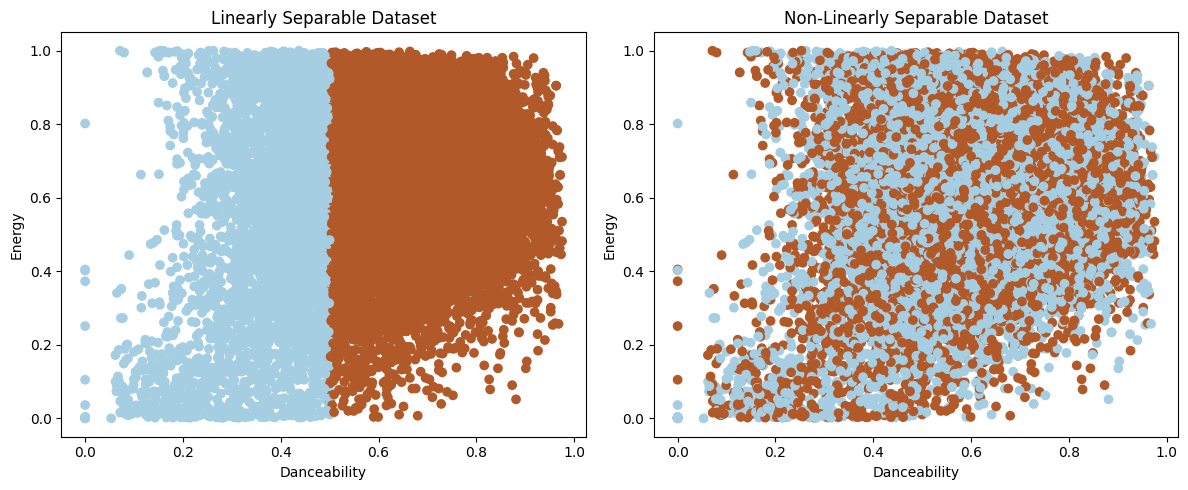

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Spotify_Youtube.xlsx'
data = pd.read_excel(file_path)

# Select relevant columns
selected_columns = ['Likes', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
selected_data = data[selected_columns]

# Function to create a linearly separable dataset based on Danceability and Energy
def create_linearly_separable_dataset(data):
    danceability_threshold = 0.5
    data['Class'] = (data['Danceability'] > danceability_threshold).astype(int)
    return data[['Danceability', 'Energy']], data['Class']

# Function to create a non-linearly separable dataset with randomness
def create_non_linearly_separable_dataset(data):
    data['Class'] = np.random.randint(2, size=len(data))
    return data[['Danceability', 'Energy']], data['Class']

# Create linearly separable dataset
X_linear, y_linear = create_linearly_separable_dataset(selected_data.copy())

# Create non-linearly separable dataset
X_non_linear, y_non_linear = create_non_linearly_separable_dataset(selected_data.copy())

# Split the datasets into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_idx = int((1 - test_size) * len(X))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split_custom(X_linear, y_linear, test_size=0.2, random_state=42)
X_non_linear_train, X_non_linear_test, y_non_linear_train, y_non_linear_test = train_test_split_custom(X_non_linear, y_non_linear, test_size=0.2, random_state=42)

# Impute missing values in the linearly separable dataset
X_linear_train_imputed = np.where(np.isnan(X_linear_train), np.nanmean(X_linear_train, axis=0), X_linear_train)
X_linear_test_imputed = np.where(np.isnan(X_linear_test), np.nanmean(X_linear_train, axis=0), X_linear_test)

# Impute missing values in the non-linearly separable dataset
X_non_linear_train_imputed = np.where(np.isnan(X_non_linear_train), np.nanmean(X_non_linear_train, axis=0), X_non_linear_train)
X_non_linear_test_imputed = np.where(np.isnan(X_non_linear_test), np.nanmean(X_non_linear_train, axis=0), X_non_linear_test)

# Standardize features
def standardize_features(X_train, X_test):
    mean = np.nanmean(X_train, axis=0)
    std = np.nanstd(X_train, axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_linear_train_imputed_scaled, X_linear_test_imputed_scaled = standardize_features(X_linear_train_imputed, X_linear_test_imputed)
X_non_linear_train_imputed_scaled, X_non_linear_test_imputed_scaled = standardize_features(X_non_linear_train_imputed, X_non_linear_test_imputed)

# Hard Margin Linear SVM for linearly separable dataset
def linear_svm_fit_predict(X_train, y_train, X_test):
    weights = np.zeros(X_train.shape[1] + 1)
    X_train_bias = np.column_stack((np.ones(len(X_train)), X_train))
    X_test_bias = np.column_stack((np.ones(len(X_test)), X_test))
    for _ in range(100000):  # Increase max_iter
        predictions = np.sign(np.dot(X_train_bias, weights))
        misclassified = predictions != y_train
        if not misclassified.any():
            break
        gradient = -np.dot(misclassified * y_train, X_train_bias) / len(X_train)
        weights -= 0.01 * gradient  # Learning rate 0.01
    return np.sign(np.dot(X_test_bias, weights)), weights

print("Training Linear SVM for linearly separable dataset...")
y_linear_pred, linear_weights = linear_svm_fit_predict(X_linear_train_imputed_scaled, y_linear_train, X_linear_test_imputed_scaled)

# Hard Margin Linear SVM for non-linearly separable dataset
print("Training Linear SVM for non-linearly separable dataset...")
y_non_linear_pred, non_linear_weights = linear_svm_fit_predict(X_non_linear_train_imputed_scaled, y_non_linear_train, X_non_linear_test_imputed_scaled)

# Accuracy for linearly separable dataset
accuracy_linear = np.mean(y_linear_test == y_linear_pred)

# Accuracy for non-linearly separable dataset
accuracy_non_linear = np.mean(y_non_linear_test == y_non_linear_pred)

# Print accuracy
print(f'Accuracy for Linearly Separable Dataset: {accuracy_linear:.2f}')
print(f'Accuracy for Non-Linearly Separable Dataset: {accuracy_non_linear:.2f}')

# Plot the datasets
plt.figure(figsize=(12, 5))

# Linearly separable dataset
plt.subplot(1, 2, 1)
plt.scatter(X_linear['Danceability'], X_linear['Energy'], c=y_linear, cmap=plt.cm.Paired, marker='o')
plt.title('Linearly Separable Dataset')
plt.xlabel('Danceability')
plt.ylabel('Energy')

# Non-linearly separable dataset
plt.subplot(1, 2, 2)
plt.scatter(X_non_linear['Danceability'], X_non_linear['Energy'], c=y_non_linear, cmap=plt.cm.Paired, marker='o')
plt.title('Non-Linearly Separable Dataset')
plt.xlabel('Danceability')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()
